# **ЗАДАНИЕ №1. Сверточные фильтры.**


**Вариант №1**: Осуществить программную реализацию свёрточного фильтра для выделения границ на изображении.


 **Вариант №2**: Осуществить программную реализацию свёрточного фильтра для  увеличения резкости изображения.



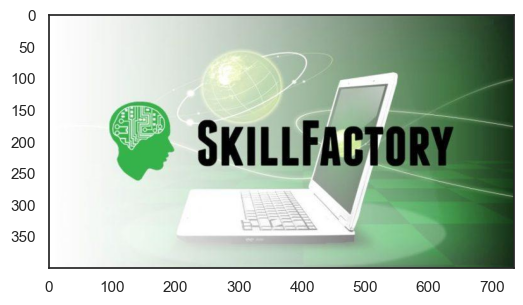

In [2]:
import numpy as np
import cv2
import seaborn as sns
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

sns.set(style="darkgrid", font_scale=1.4)
sns.set(style="white")
img = cv2.imread("data/sample_photo.jpg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 4))
plt.imshow(RGB_img)
plt.show()

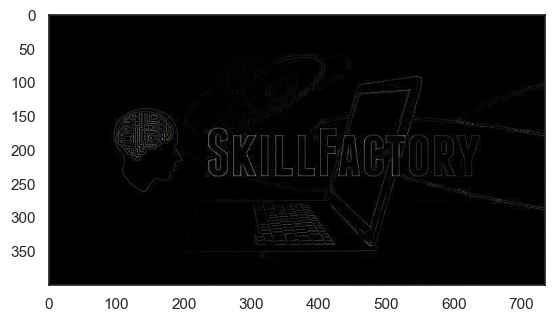

In [10]:
# Выделение границ на изображении
edge_kernel = np.array(
    [[0, 1, 0], 
    [1, -4, 1], 
    [0, 1, 0]]) 

edge_img = cv2.filter2D(src=img, ddepth=-1, kernel=edge_kernel) 

plt.imshow(edge_img) 
plt.show()

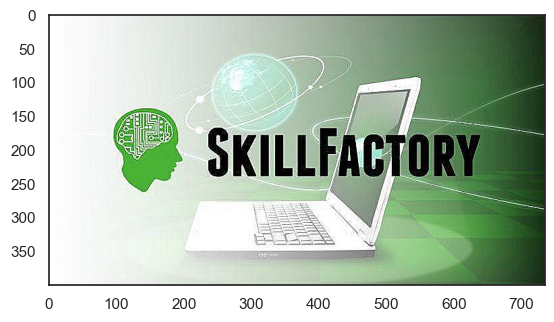

In [13]:
# Увеличение резкости иображения
sharp_kernel = np.array(
    [[0, -1, 0], 
    [-1, 5, -1], 
    [0, -1, 0]]) 

sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=sharp_kernel) 

plt.imshow(sharp_img) 
plt.show()

# **ЗАДАНИЕ №2. Архитектура.**

**Вариант №1.**
Используя фреймворк Keras, реализовать загрузку модели сверточной нейронной сети **ResNet101**. Осуществить вывод состава модели. Произвести выбор двух слоев (не менее 2-х) и применить их к данному изображению. Визуализировать результирующее изображение, прошедшее через фильтры избранных слоёв.

In [102]:
import cv2
import keras
from keras import Model
from keras.applications.resnet import ResNet101
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img("data/sample_photo.jpg", target_size=(224, 224))

In [83]:
resnet = ResNet101()

In [17]:
resnet.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 44,707,176 (170.54 MB)

 Trainable params: 44,601,832 (170.14 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [104]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Изображение нужно приводить к диапазону [0,1]
img_tensor /= 255.

print(img_tensor.shape)

(1, 224, 224, 3)


In [119]:
layer_outputs = [layer.output for layer in resnet.layers[:8]]
activation_model = Model(inputs=resnet.input, outputs=layer_outputs)
acts = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


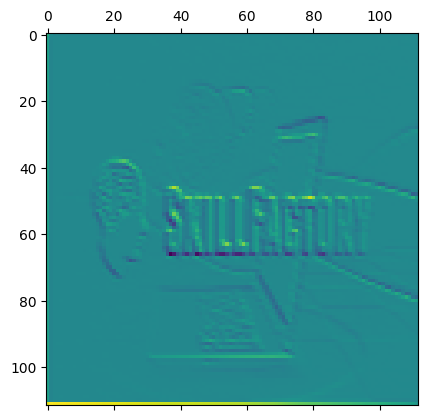

In [120]:
# Визуализация слоя свертки
first_conv2d = acts[2]
plt.matshow(first_conv2d[0, :, :, 1], cmap='viridis')

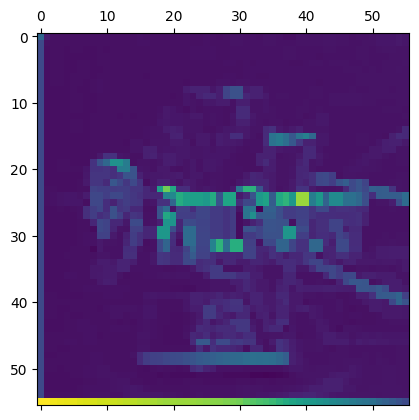

In [124]:
# Визуализация слоя pooling
first_maxpooling = acts[6]
plt.matshow(first_maxpooling[0, :, :, 1], cmap='viridis')

# **ЗАДАНИЕ №3. Проектирование модели.**

**Вариант №1**

Произвести задачу классификации изображений одежды из базы данных **Fashion MNIST** dataset из Keras. Всего в базе данных 10 классов одежды. В классификации использовать[ в качестве ошибки – среднеквадратическую, оптимизатор – стохастический градиентный спуск, метрику – Precision.](https://keras.io/api/)

Требования к структуре модели:


1. Свёртка 3x3 (32 фильтра на выходе) с активацией ReLU;
2. Пакетная нормализация;
3. Пулинг 2х2;
4. Пакетная нормализация;
5. Свёртка 3x3 (64 на выходе) с активацией ReLU;
6. Пакетная нормализация;
7. Пулинг 2х2;
8. Пакетная нормализация;
9. Уплощение (nn.Flatten);
10. Полносвязный слой с 64 нейронами и активацией ReLU;
11. Пакетная нормализация;
12. Выходной слой из 10 нейронов.


In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import precision_score

In [24]:
# загрузка БД Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist as fmnist

Предобработка данных

In [25]:
# разбивка на тест трейн выборки
(x_train1, y_train1), (x_test1, y_test1) = fmnist.load_data()

y_train1 = utils.to_categorical(y_train1, 10)
y_test1 = utils.to_categorical(y_test1, 10)
# стандартизация входных данных
x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')
x_train1 /= 255
x_test1 /= 255

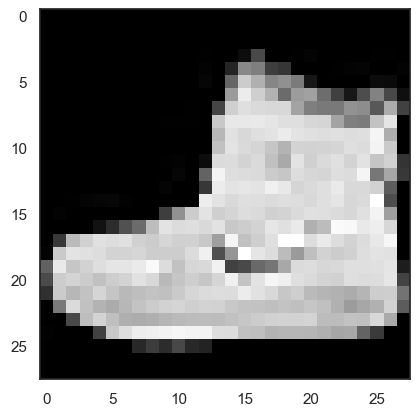

In [21]:
# визуализация образца
n = 0
plt.imshow(x_train1[n], cmap="gray")
plt.show()

In [26]:
# проверяем размеры выборок
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [29]:
model = Sequential()
model.add(Input((28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(
    loss='mse',
    optimizer='SGD',
    metrics=['precision'] 
)

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,258 (864.29 KB)

 Trainable params: 220,746 (862.29 KB)

 Non-trainable params: 512 (2.00 KB)

In [33]:
# Обучаем модель
history = model.fit(
    x_train1[:, :, :, np.newaxis],
    y_train1,
    batch_size=64,
    epochs=5,
    validation_data=(x_test1[:, :, :, np.newaxis], y_test1)
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 94ms/step - loss: 0.0598 - precision: 0.7404 - val_loss: 0.0306 - val_precision: 0.8905
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 101ms/step - loss: 0.0287 - precision: 0.8919 - val_loss: 0.0255 - val_precision: 0.8993
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - loss: 0.0244 - precision: 0.9028 - val_loss: 0.0232 - val_precision: 0.9047
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - loss: 0.0225 - precision: 0.9056 - val_loss: 0.0218 - val_precision: 0.9058
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - loss: 0.0207 - precision: 0.9120 - val_loss: 0.0207 - val_precision: 0.9074


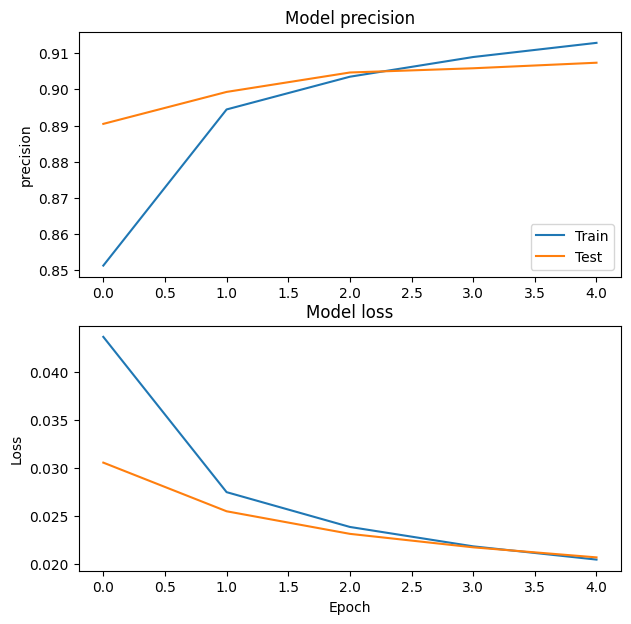

In [36]:
# Построим график точности в зависимости от эпохи
plt.style.use(['default'])
fig, ax = plt.subplots(figsize=(7,7), nrows=2, ncols=1)
ax[0].plot(history.history['precision'])
ax[0].plot(history.history['val_precision'])
ax[0].set_title('Model precision')
ax[0].set_ylabel('precision')
ax[0].legend(['Train', 'Test'], loc='lower right')

# Построим график потерь в зависимости от эпохи
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
plt.show()

In [50]:
# Сделаем предсказание на тестовых данных
predicts=model.predict(x_test1)
classes_x=np.argmax(predicts,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


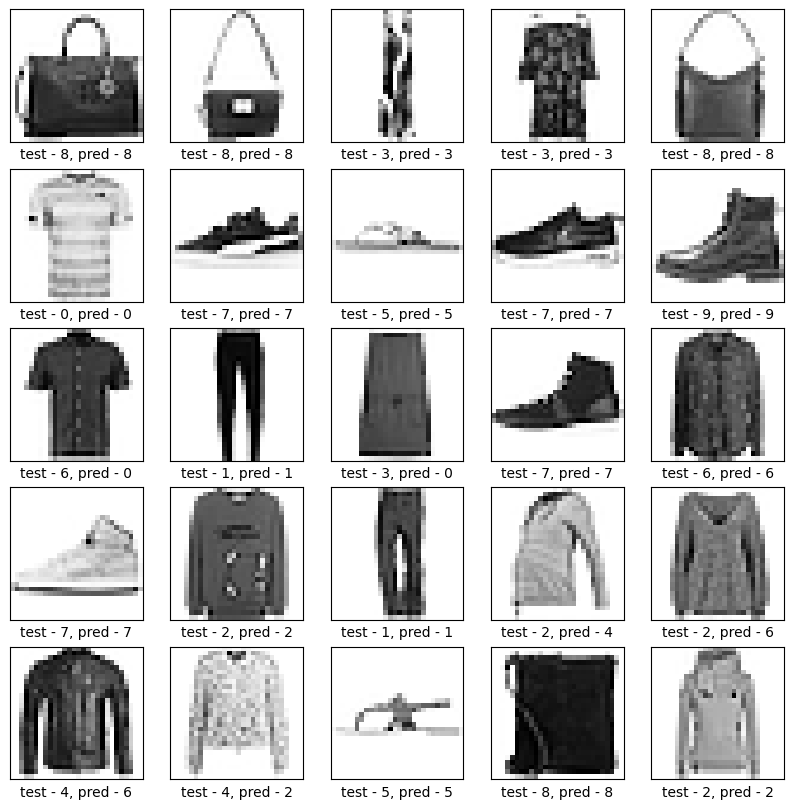

In [52]:
# Посмотрим на качество классификации
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test1[i+30], cmap="Greys")
    x_lab = 'test - ' + str(np.argmax(y_test1,axis=1)[i+30]) + ', pred - ' + str(classes_x[i+30])
    plt.xlabel(x_lab)
plt.show()

**Вариант №2**

Произвести задачу классификации изображений одежды из базы данных **CIFAR10** dataset из Keras. Всего в базе данных 10 классов одежды. В классификации использовать в качестве ошибки – [категориальную перекрестную энтропию, оптимизатор – алгоритм адаптивной оптимизации, метрику – Recall.](https://keras.io/api/)

Требования к структуре модели:
1. Пакетная нормализация;
2. Свёртка 3x3 (128 фильтров на выходе) с активацией ReLU;
3. Пулинг 2х2;
4. Регуляризация Dropout с вероятностью 0.25;
5. Пакетная нормализация;
6. Свёртка 3x3 (256 фильтров на выходе) с активацией ReLU;
7. Пулинг 2х2;
8. Регуляризация Dropout с вероятностью 0.25;
9. Уплощение (nn.Flatten);
10. Полносвязный слой с 256 нейронами и активацией ReLU;
11. Регуляризация Dropout с вероятностью 0.5;
12. Выходной слой из 10 нейронов.



In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from tensorflow.keras.datasets import cifar10

Предобработка данных

In [55]:
# разбивка на тест трейн выборки
(x_train1, y_train1), (x_test1, y_test1) =cifar10.load_data()

y_train1 = utils.to_categorical(y_train1, 10)
y_test1 = utils.to_categorical(y_test1, 10)
# стандартизация входных данных
x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')
x_train1 /= 255
x_test1 /= 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


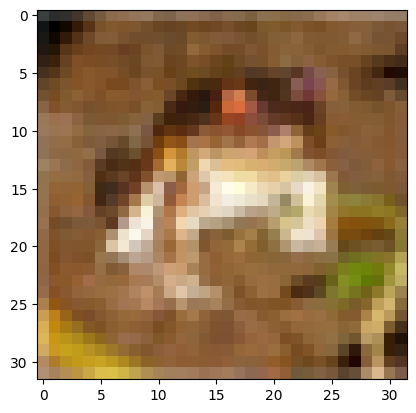

In [56]:
# визуализация образца
n = 0
plt.imshow(x_train1[n])
plt.show()

In [57]:
# проверяем размеры выборок
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [69]:
model = Sequential()
model.add(Input((32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [70]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['recall'] 
)

In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_16          │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,496,406 (17.15 MB)

 Trainable params: 4,496,144 (17.15 MB)

 Non-trainable params: 262 (1.02 KB)

In [72]:
# Обучаем модель
history = model.fit(
    x_train1,
    y_train1,
    batch_size=64,
    epochs=5,
    validation_data=(x_test1, y_test1)
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 425s 539ms/step - loss: 2.7724 - recall: 0.0387 - val_loss: 1.6796 - val_recall: 0.0590
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 429s 548ms/step - loss: 1.7928 - recall: 0.0912 - val_loss: 1.5129 - val_recall: 0.1102
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 399s 510ms/step - loss: 1.6735 - recall: 0.1201 - val_loss: 1.4017 - val_recall: 0.1829
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 320s 409ms/step - loss: 1.5398 - recall: 0.1775 - val_loss: 1.2789 - val_recall: 0.2703
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 367s 469ms/step - loss: 1.4470 - recall: 0.2488 - val_loss: 1.1747 - val_recall: 0.3488


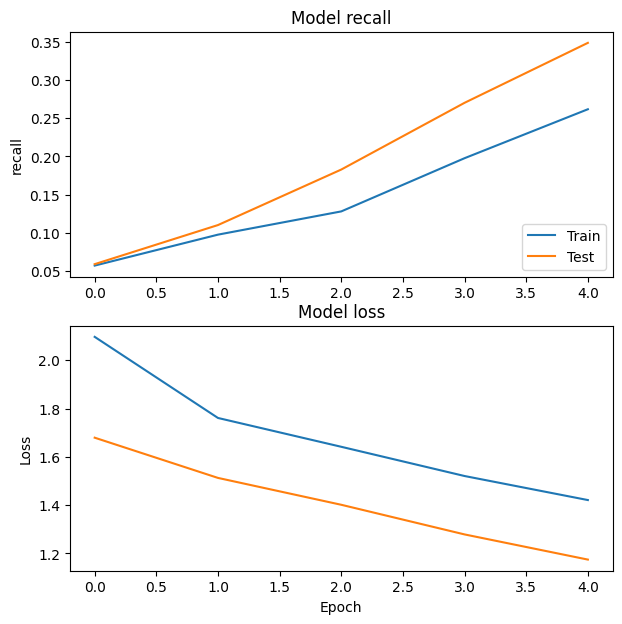

In [89]:
# Построим график точности в зависимости от эпохи
plt.style.use(['default'])
fig, ax = plt.subplots(figsize=(7,7), nrows=2, ncols=1)
ax[0].plot(history.history['recall'])
ax[0].plot(history.history['val_recall'])
ax[0].set_title('Model recall')
ax[0].set_ylabel('recall')
ax[0].legend(['Train', 'Test'], loc='lower right')

# Построим график потерь в зависимости от эпохи
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
plt.show()

In [90]:
# Сделаем предсказание на тестовых данных
predicts=model.predict(x_test1)
classes_x=np.argmax(predicts,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step


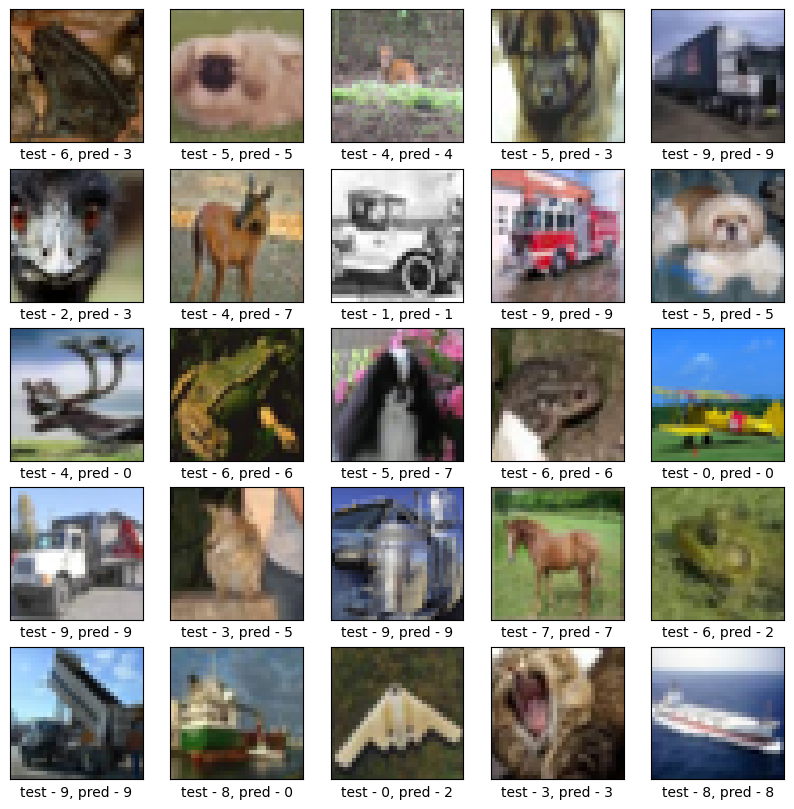

In [91]:
# Посмотрим на качество классификации
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test1[i+30])
    x_lab = 'test - ' + str(np.argmax(y_test1,axis=1)[i+30]) + ', pred - ' + str(classes_x[i+30])
    plt.xlabel(x_lab)
plt.show()